# Table of Contents
* [1. Les bases de la dynamique des populations](#1.-Les-bases-de-la-dynamique-des-populations)
	* [1.1 La suite de Fibonacci](#1.1-La-suite-de-Fibonacci)
	* [1.2 Digression: comparer des temps d'exécution](#1.2-Digression:-comparer-des-temps-d'exécution)
	* [1.3 Modèles différentiels](#1.3-Modèles-différentiels)
	* [1.4 Croissances géométrique et exponentielle](#1.4-Croissances-géométrique-et-exponentielle)
	* [1.5 Croissance logistique](#1.5-Croissance-logistique)
	* [1.6 Modèle de Lotka-Volterra](#1.6-Modèle-de-Lotka-Volterra)
	* [1.7 Le chemostat](#1.7-Le-chemostat)


# 1. Les bases de la dynamique des populations

Voir [[Bacaer 2009](#cite-bacaer2009a)] très intéressante perspective historique, [[Boularas et al 2009](#cite-boularas2009a)] présentation très vivante et accessible des modèles différentiels, [[Otto et Dray2007](#cite-otto2007a)] très complet et tourné vers les biologistes.

## 1.1 La suite de Fibonacci

<img src="https://upload.wikimedia.org/wikipedia/commons/3/35/Fibonacci2.jpg" alt="schema_pop" style="width: 150px;"/>
[Leonardo Fibonacci](https://en.wikipedia.org/wiki/Fibonacci) (c. 1170-c. 1250) considera en 1202 un problème de croissance de populations de lapins:

> Combien de couples de lapins obtiendrons-nous à la fin de l'année si, 
> commençant avec un couple, chacun des couples produisait chaque mois un 
> nouveau couple lequel deviendrait productif au second mois de son existence ?

Si $x_{n}$ désigne la taille de la population au mois $n$ et si on suppose que $x_{1}=x_{2}=1$, alors au troisième mois ce couple se reproduit donc $x_{3}=2$, le mois suivant le premier couple se reproduit à nouveau et le couple obtenu au mois précédent n'est pas encore productif donc $x_{4}=3$, ainsi de suite:
![suite de Fibonacci](./images/suite_fibonacci.png)
(en rouge les couples en âge de se reproduire).

À un mois $n$ donné, la population comprend tous les couples du mois $n-2$ qui se sont reproduits au mois $n-1$ donc $2\,x_{n-2}$ auxquels s'ajoutent les couples produits au mois $n-1$ qui ne sont pas en âge de se reproduire, c'est-à-dire $x_{n-1}-x_{n-2}$. Ainsi $x_{n}=2\,x_{n-2}+(x_{n-1}-x_{n-2})$ d'où la relation de récurrence:
\begin{equation}\label{eqFibonacci}
 x_{n} = x_{n-1}+x_{n-2}\,,\ x_{1}=x_{2}=1\,.
\end{equation}
Cette [suite](https://en.wikipedia.org/wiki/Fibonacci_number) dite de Fibonacci est décrite sous la forme d'un système dynamique en temps discret \eqref{eqFibonacci}, i.e. la taille de la population n'est explicitement pas donnée, seule la dynamique de croissance locale en temps l'est.
Il faudra attendre plus de cinq cent ans pour que la formule explicite de cette suite soit établie: 
\begin{equation}\label{eqFibonacciExp}
x_{n}=[{(1+\sqrt{5})^n-(1-\sqrt{5})^{n}}]/[{2^n\,\sqrt{5}}]\,.
\end{equation}
Sur la plan de la dynamique de populations cette suite ne présente que peu d'intérêt. En effet elle croit plus vite que $n^2$ mais nettement moins vite que $2^n$. Elle a plus étonnamment trouvé des applications en [architecture des plantes](https://en.wikipedia.org/wiki/Patterns_in_nature). 

La suite de Fibonacci n'est pas un bon modèle de population. Des modèles en temps discret on été proposés aux XVII et XVIIIe siècles.   Les premiers modèles en temps continu apparaissent au 18ème siècle.

[Daniel Bernoulli](https://en.wikipedia.org/wiki/Daniel_Bernoulli) (1700-1782) proposa une des premières études d'épidémiologie concernant l'inoculation de la variole. 
En 1760, il propose un modèle épidémiologique à l'aide d'équations différentielles et établit que, selon ce modèle, la généralisation de cette pratique permettrait de gagner un peu plus de trois ans d’espérance de vie à la naissance. La pratique a été généralisée quelques dizaines d'années plus tard par le médecin anglais Edward Jenner. C'est seulement un siècle plus tard que Louis Pasteur a clairement établi le principe d'action de la vaccination et celui du système immunitaire.

[Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler) (1707-1783) décrit la croissance géométrique des populations. 

[Thomas Malthus](https://fr.wikipedia.org/wiki/Thomas_Malthus) (1766-1834) pense que les idées progressistes de Condorcet et William Godwin concernant les politiques à adopter face à la misère d'une classe importante de la population sont dangereuses. 
Pour Malthus la croissance géométrique de la population face à une croissance arithmétique des ressources conduit toujours au développement d'une classe exposée au vice et à la misère.
Il propose ainsi de coupler un modèle de croissance de population et des  ressources. Le modèle de Malthus n'est toutefois pas réaliste dans la mesure où il ne tient pas compte de l'influence du niveau des ressources sur la croissance de la population. 

On dispose de [pluisieurs façons](http://stackoverflow.com/questions/494594/how-to-write-the-fibonacci-sequence-in-python) de programmer cela en Python. La version récursive n'est pas la plus efficace, la plus simple est relativement efficace:

In [35]:
import numpy as np

def fibonacci(n):
 a,b = 1,1
 for i in range(n-1):
  a,b = b,a+b
 return a

def fibonacci_explicit(n):
    return np.int(np.ceil((1+np.sqrt(5))**n-(1-np.sqrt(5))**n)/(2**n*np.sqrt(5)))

def fibonacci_recursive(n):
    if n==1 or n==2:
        return 1
    return fibonacci_recursive(n-1)+fibonacci_recursive(n-2)

## 1.2 Digression: comparer des temps d'exécution

Jypiter  [permet](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)  de mesurer des temps d'exécution, de profiler et de débugger. Pour mesurer les temps d'exécution on fait appel aux [commandes magiques](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb) comme `time` ou `timeit`.

In [36]:
%time
for n in range(1,20):
    fibonacci(n)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs


In [25]:
%time
for n in range(1,20):
    fibonacci_explicit(n)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


In [26]:
%time
for n in range(1,20):
    fibonacci_recursive(n)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


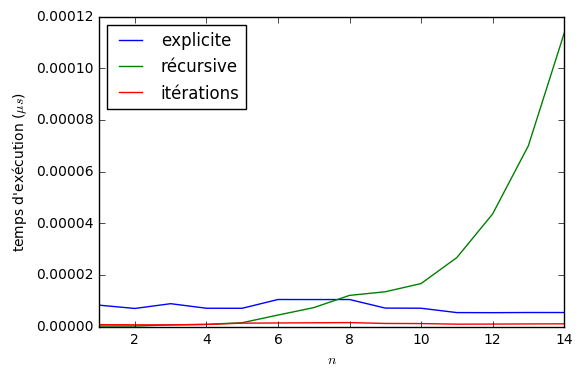

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

temps_calcul = {}
temps_calcul['itérations'] = {}
temps_calcul['explicite'] = {}
temps_calcul['récursive'] = {}
for n in range(1,15):
    result = %timeit -n 10 -q -o fibonacci(n)   
    ''' -n number of times the instruction is executed
    -q quiet 
    -o return a TimeitResult that can be stored in a variable to inspect
    '''
    temps_calcul['itérations'][n] = result.best
    result = %timeit -n 10 -q -o fibonacci_explicit(n)
    temps_calcul['explicite'][n] = result.best
    result = %timeit -n 10 -q -o fibonacci_recursive(n)
    temps_calcul['récursive'][n] = result.best        
for a,b in temps_calcul.items():
    plt.plot(list(b.keys()),list(b.values()))
plt.xlim(1,14)
plt.legend(list(temps_calcul.keys()), loc='upper left')
plt.ylabel(r"temps d'exécution ($\mu s$)")
plt.xlabel(r'$n$')
plt.show()


La formule explicite \eqref{eqFibonacciExp} conduit à un très mauvais algorithme puisque pour les grandes valeurs de $n$, elle fait apparaitre par exemple la différence de deux termes $1+\sqrt(5))^n$ et $1-\sqrt(5))^n$ qui divergent.

## 1.3 Modèles différentiels

Nous voulons modéliser l'évolution de la taille d'une population mono-spécifique, c'est-à-dire supposée composée d'une seule espèce. Notons $n(t)$ la taille de cette population à l'instant $t$, il s'agit d'une quantité entière. Nous allons modéliser l'évolution de cette taille à des instants  $t_{k}$, que nous supposerons pour simplifier équirépartis, i.e. $t_{k}=k\,h$ avec $h>0$:

<img src="./images/schema_pop.png" alt="schema_pop" style="width: 550px;"/>

Modéliser l'évolution de la taille de population consiste à définir la variation $\Delta n(t_{k})$ de cette taille entre les instants $t_{k}$ et $t_{k+1}$:
$$
  n(t_{k+1})=n(t_{k})+\Delta n(t_{k})\,.
$$
On suppose donc que ces accroissements dépendent de la taille courante de la population. Il est pertinent de s'intéresse à la variation de la taille de la population par unité de temps:
$$
  \frac{n(t_{k+1})-n(t_{k})}{h}=\frac{\Delta n(t_{k})}{h}\,.
$$
On fait l'hypothèse que les instants $t_{k}$ sont rapprochés, i.e. $h$ petit.

Dans l'équation précédente on fait tendre $h$ vers 0 et $k$ vers l'infini de telle sorte que $t_{k}\to t$ pour $t$ donné. On suppose aussi que $\Delta n(t_{k})$ tend vers l'infini de telle sorte que le rapport $\Delta n(t_{k})/h$ tende vers un certain $F(n(t))$:
\begin{align}\label{eqNt}
  \dot n(t)=F(n(t))\,.
\end{align}
Enfin, *{la taille $n(t)$ de la population est supposée très grande}* et nous faisons le *changement* d'échelle suivant:
$$
   x(t) := \frac{n(t)}{M}
$$
Ce changement de variable peut s'interpréter de différentes façons. Par exemple pour une population de bactéries:
\begin{enumerate}
\item
$M$ peut être vu comme l'inverse de la masse d'une bactérie, alors $x(t)$ désigne la *{biomasse}* de la population; 
\item
$M$ peut être le *volume* dans lequel vit cette population, $x(t)$ est alors une *densité* de population; 
\item
$M$ peut être simplement un *changement d'échelle*, si la taille de la population est de l'ordre de $10^{9}$ individus et si $M=10^{3}$ alors $x(t)$ désignera la taille de la population de méta-individus (1 méta-individu = $10^3$ individus). 
\end{enumerate}
L'équation \eqref{eqNt}
 devient:
$$
  \frac{\dot n(t)}{M}=\frac{1}{M}\,F\Bigl(M\,\frac{n(t)}{M}\Bigr)
$$
et en posant $f(x) := \frac{1}{M}\,F(M\,x)$ on obtient l'équation différentielle ordinaire (EDO):
$$
  \dot x(t)=f(x(t))\,,\ x(0)=x_{0}
$$
et son état $x(t)$ peut donc désigner la *taille* d'une population, sa *biomasse*, sa *densité* (nombre d'individus par unité de volume), ou bien encore sa *concentration* (massique ou molaire); pour simplifier nous dirons que $x(t)$ ``est'' la population; $x_{0}$ désigne la population initiale, supposée connue.

Dans beaucoup d'exemple $f$ est de la forme:
$$
 f(x)=r(x)\,x
$$
où $r(x)$ s'interprète comme un \emph{taux de croissance per capita} (par individu). En effet si $x(t+h)=x(t)+f(x(t))$ ($h=1$ unité de temps) et si par exemple $f(x(t))=5$  il y alors eu un accroissement de 5 individus (dans l'échelle $x$) sur la période de temps $h$: est-ce grand ou petit ? Cela est relatif à la taille $x(t)$ de la population, c'est donc le rapport $\frac{f(x(t))}{x(t)}=r(x(t))$ qui importe.

## 1.4 Croissances géométrique et exponentielle



 
La première étape consiste à appréhender la croissance géométique (temps discret) et exponentielle (temps continu).

On considère une population dont la taille évolue de la façon suivante:
$$
  n(t_{k+1}) 
  = n(t_{k})
  +\lambda\,n(t_{k})\,h
  -\mu\,n(t_{k})\,h
$$
où $\lambda$ est le taux de naissance et $\mu$ celui de mort. Il est nécessaire 
ici que l'intervalle de temps $[t_{k},t_{k+1}]$ soit suffisamment petit pour que 
$n(t_{k})$ évolue peu, mais aussi suffisamment grand pour que des 
événements de naissance et mort surviennent. Après changement d'échelle, 
l'équation précédente devient:
$$
   \dot x(t) = (\lambda-\mu)\,x(t)\,,\ x(0)=x_0
$$
taux de naissance $\lambda>0$, taux de mort $\mu>0$.

qui admet la solution explicite suivante:
$$
  x(t) = x_{0}\,e^{(\lambda-\mu)\,t}\,,\quad t\geq 0\,.
$$

In [28]:
population = lambda t: x0*np.exp((rb-rd)*t)

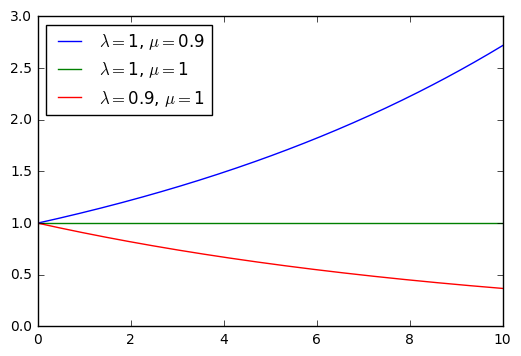

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

t0, t1 = 0, 10
temps = np.linspace(t0,t1,200, endpoint=True)

legende = []
for x0, rb, rd in zip([1, 1, 1], [1, 1, 0.9], [0.9, 1, 1]):
    plt.plot(temps, population(temps))
    legende = legende + [r'$\lambda=$'+str(rb)+r', $\mu=$'+str(rd),]
plt.legend(legende, loc='upper left')
plt.show()

Ainsi lorsque $\mu>\lambda$ la population croît exponentiellement. Lorsque $\lambda<\mu$ la population tend exponentiellement vers 0. On parlera de croissance (ou décroissance) malthusienne. Lorsque  $\lambda<\mu$ la population décroît exponentiellement vite vers 0 mais à tout instant fini cette population est strictement positive, pourtant si $M=10^3$ et si $x(t)$ descend en dessous de $10^{-3}$ alors $x(t)$ représentera moins d'un individu. Ce point n'est pas cohérent avec l'hypothèse de population grande et donc limite l'intérêt de ce modèle pour les petites tailles de population.

## 1.5 Croissance logistique

En 1838,
 [Pierre François Verhulst](https://en.wikipedia.org/wiki/Pierre_Francois_Verhulst) (1804-1849)
 proposa un modèle de croissance  dont le taux de croissance diminue linéairement en fonction de la taille de la population rendant ainsi compte de la capacité maximale d'accueil du milieu \citep{verhulst1838a}. Cette courbe dite logistique, a été redécouverte et (très) popularisée par le biologiste et démographe Raymond Pearl  \citep{pearl1920a,kingsland1982a}.


$$
  \dot x(t) = r\,\left(1-\frac{x(t)}{K}\right)\,x(t)\,,\ x(0)=x_0
$$
admet l'unique solution:
$$
  x(t) =  K \,\frac{1}{1+\left(\frac {K}{x_{0}} - 1\right) \,e^{-r\,t}}\,.
$$

In [30]:
population = lambda t: K*1/(1+ (K/x0-1) * np.exp(-r*t))

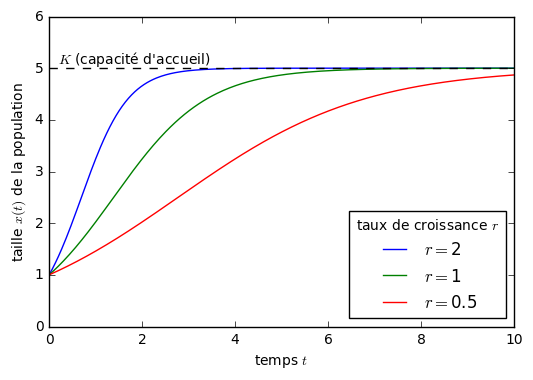

In [31]:
t0, t1 = 0, 10

temps = np.linspace(t0,t1,300, endpoint=True)

x0, K = 1, 5
legende = []
for r in [2, 1, 0.5]:
    plt.plot(temps, population(temps))
    legende = legende + [r'$r=$'+str(r),]    
plt.ylim([0,K*1.2])
plt.legend(legende, loc='lower right',title=r'taux de croissance $r$')
plt.plot([t0, t1], [K, K], color="k", linestyle='--')
plt.text((t1-t0)/50, K, r"$K$ (capacité d'accueil)", 
         verticalalignment='bottom', horizontalalignment='left')
plt.xlabel(r'temps $t$')
plt.ylabel(r'taille $x(t)$ de la population')
plt.show()

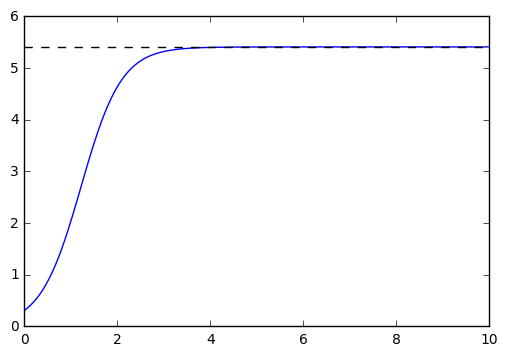

In [32]:
from IPython.html.widgets import interact, fixed

def pltlogistique(x0,K,r):
    population2 = K*1/(1+ (K/x0-1) * np.exp(-r*temps))
    plt.plot(temps, population2)
    plt.ylim([0,6])
    plt.plot([t0, t1], [K, K], color="k", linestyle='--')
    plt.show()
    
interact(pltlogistique, x0=(0.01,6,0.1), K=(0.01,6,0.1), r=(0.1,20,0.1))
plt.show()

## 1.6 Modèle de Lotka-Volterra

Le [modèle de Lotka-Volterra](https://fr.wikipedia.org/wiki/Équations_de_Lotka-Volterra) représente deux populations en interaction, des proies, de taille $x(t)$, ayant accès à une ressource ilimitée (non modélisée) et des prédateurs se nourissant de proies. En l'absence de prédateurs, la population de proies croit de façon exponentielle selon un taux $r_1$; en l'abscence de proies, la population de prédateurs décroit de façon exponentielle selon un taux $r_2$.
On suppose que $r_1$ dépend de $y(t)$ et que $r_2$ dépend de $x(t)$: 

- $r_1=a-b\,y(t)$, où $a$ est le taux de naissance des proies en l'absence de prédateurs et $b\,y(t)$ est le taux de prédation que l'on suppose linéaire en $y(t);

- $r_2=c-d\,x(t)$, où $c$ est le taux de mort des prédateurs en l'absence de proies et $d\,x(t)$ est le taux de naissance des prédateurs que l'on suppose linéaire en $x(t)$.

On obtient donc un système de deux équations différentielles couplées:
\begin{align*}
\dot x(t) &= [a-b\,y(t)]\,x(t)
\\
\dot y(t) &= - [c-d\,x(t)]\,y(t)
\end{align*}
ce système n'admet pas de solution explicites, on doit faire appel à une méthode numérique.

In [33]:
from scipy.integrate import odeint
import matplotlib.gridspec as gridspec

a, b, c, d = 0.4, 0.002, 0.001, 0.7
def f(xy, t):
    x, y = xy
    return [a * x - b * x * y, c * x * y - d * y]

xy0 = [600, 400]
t = np.linspace(0, 50, 250)
xy_t = odeint(f, xy0, t)

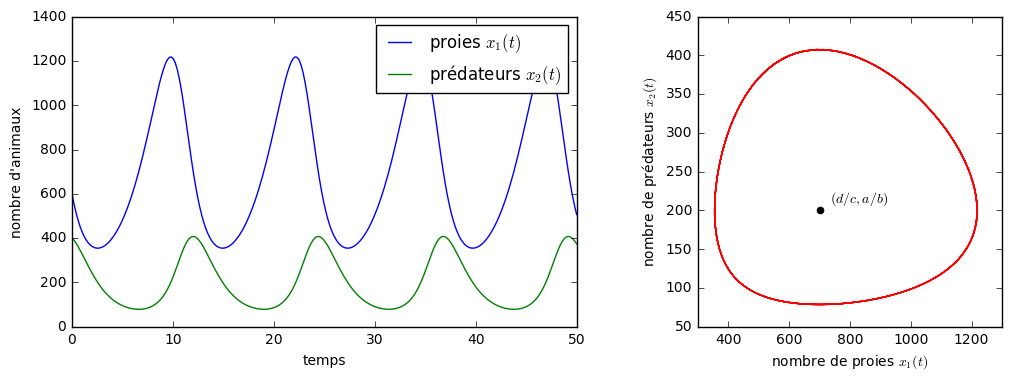

In [34]:
fig = plt.subplots(1, 2, figsize=(12, 4))

gs = gridspec.GridSpec(1, 2, width_ratios=[8.3, 5], wspace=0.3)

ax0 = plt.subplot(gs[0])
ax0.plot(t, xy_t[:,0], label=r"proies $x_1(t)$")
ax0.plot(t, xy_t[:,1], label=r"prédateurs $x_2(t)$")
ax0.set_xlabel("temps")
ax0.set_ylabel("nombre d'animaux")
ax0.legend()
ax1 = plt.subplot(gs[1])
ax1.plot(xy_t[:,0], xy_t[:,1], color="r")
ax1.set_xlabel(r"nombre de proies $x_1(t)$")
ax1.set_ylabel(r"nombre de prédateurs $x_2(t)$")
marker_style = dict(linestyle=':', markersize=10)
ax1.plot([d/c], [a/b], marker='.', **marker_style, color="k")
ax1.text(1.05*d/c, 1.05*a/b, r'$(d/c,a/b)$')
plt.show()

## 1.7 Le chemostat

$\newcommand{eqdef}{:=} \newcommand{\Ks}{K_{\textrm{s}}}\newcommand{\Ky}{K_{\textrm{y}}}\newcommand{\mumax}{\mu_{\textrm{max}}}\newcommand{\ssin}{s^{\textrm{in}}}\newcommand{\Qin}{Q^{\textrm{in}}}\newcommand{\Qout}{Q^{\textrm{out}}}$


Un bioréacteur est une enceinte confinée dans laquelle se réalisent des interactions biochimiques. Un exemple de bioréacteur est donné par le chemostat: il s'agit d'un dispositif dans lequel des micro-organismes (bactéries, phytoplancton, etc.) sont mis en présence d'une ressource limitante (substrat) et d'autres éléments non limitants. Il est alors possible de quantifier la réponse de la population en culture en fonction des variations de la ressource limitante. Cette culture se fait en \emph{continu}: le volume $V$ du chemostat est maintenu constant à l'aide de pompes. Le substrat est injecté dans le chemostat avec un débit volumique $Q$ (en litres/jour), à une concentration $\ssin$. On définit le \emph{taux de dilution}:
\[
  D \eqdef \frac QV
\]
(exprimé en jour$^{-1}$). L'inverse $D^{-1}$ du taux de dilution est appelée le \emph{temps de résidence} des cellules dans le chemostat. À l'intérieur du chemostat, les bactéries consomment le substrat et croissent. Le mélange substrat/bactéries est pompé en sortie du chemostat. On suppose que le chemostat est mélangé de telle sorte que les répartitions de substrat et de biomasse sont homogènes dans l'espace. 





Le chemostat  est un dispositif dans lequel des bactéries sont mis en présence d'un substrat de façon continue. Les nutriments sont injectés dans le dispositif avec un débit volumique $Q$ (exprimé par exemple en litres/jour), à une
concentration $\ssin$. Dans l'enceinte du chemostat de volume $V$, les bactéries consomment le substrat: la création d'une unité de biomasse nécessite $\Ky$ unités de substrat ($\Ky$ est un coefficient de rendement, *yield* en anglais), cette ``réaction'' est notée $\displaystyle S\to^{\Ky} B$. La biomasse des bactéries croît à un taux $\mu(x_{2})$ dépendant de la concentration $x_{2}$ en substrat. Afin de garder le volume $V$ contant, le contenu du chemostat contenant une concentration $b$ de bactéries et $s$ de substrat est pompé en sortie.



\bigskip

On note $x_{1}(t)$ et $x_{2}(t)$ les concentrations respectives en biomasse et en substrat à l'instant $t$ au sein du chemostat; la dynamique est la suivante:

<img src="./images/chemostat.png" alt="chemostat" style="width: 550px;"/>


\begin{enumerate}
\item
La biomasse croît selon un taux de croissance spécifique $\mu(x_{2})$ des bactéries correspondant à une concentration  $s$ de substrat; elle est extraite du chemostat à un taux $D$. L'équation correspondante est donc $\dot x_{1}(t) = \mu(x_2(t))\,x_{1}(t)-D\,x_{1}(t)$.

\item
Le substrat est injecté dans le chemostat à la vitesse $D\,\ssin$; il est extrait du chemostat à un taux $D$; enfin si la création d'une unité de biomasse nécessite $\Ky$ unités de substrat, celui-ci est consommé à la vitesse $\mu(x_2(t))\,x_{1}(t)$. L'équation correspondante est donc $\dot x_2(t)=-\Ky\,\mu(x_2(t))\,x_{1}(t)+D\,(\ssin-x_2(t))$.

\end{enumerate}
On obtient le système couplé d'EDO:
\begin{align}
\label{eq.chemostat.1}  
\dot x_1(t) 
&= \mu(x_2(t))\,x_1(t)-D\,x_1(t)\,,
\\
\label{eq.chemostat.2}  
\dot x_2(t) 
&= -\Ky\,\mu(x_2(t))\,x_1(t)+D\,(\ssin-x_2(t))\,.
\end{align}
La dynamique de ce système dépend de la capacité des cellules à se diviser, c'est-à-dire à augmenter la biomasse de la population afin de compenser les pertes par évacuation. Cette capacité est le taux de croissance $\mu(x_2(t))$.
Il existe différentes possibilités pour la fonction de croissance (cf.  Figure \ref{fig.fonction_croissance}):
\begin{enumerate}
\item
La fonction de croissance de Monod:
%, souvent appelée à tors fonction de croissance de Michaelis-Menten \cite[\S 1.4.1]{jlobry1991a}:
\begin{align}
\label{eq.croissance.monod}
  \mu(x_{2})
  =
  \mumax\,\frac{x_{2}}{\Ks+x_{2}}
\end{align}
où $\Ks$ est appelée constante de demi-saturation, i.e. $\mu(\Ks)=\frac12 \, \mumax$. 
\item
La fonction de croissance d'Haldane:
\begin{align}
\label{eq.croissance.inhibition}
  \mu(x_{2})
  =
  \mumax\,\frac{x_{2}}{\Ks+x_{2}+x_{2}^2/\alpha}
\end{align}
\end{enumerate}
Dans le premier cas il y a un phénomène de saturation, dans le second un phénomène d'inhibition. Nous nous plaçons dans le premier cas.

<!--bibtex

@book{bacaer2009a,
	Author = {Nicolas Baca{\"e}r},
	Publisher = {Editions Cassini},
	Title = {Histoires de math{\'e}matiques et de populations},
	Year = {2009}}
 
@book{boularas2009a,
	Author = {Driss Boularas and Daniel Fredon and Daniel Petit},
	Publisher = {Dunod},
	Title = {Mini Manuel de Mathématiques pour les sciences de la vie et de l'environnement},
	Year = {2009}}

@book{otto2007a,
	Author = {Otto, Sarah P. and Day, Troy},
	Date-Added = {2009-11-29 20:19:32 +0100},
	Date-Modified = {2009-11-29 20:20:05 +0100},
	Publisher = {Princeton University Press},
	Title = {A Biologist's Guide to Mathematical Modeling in Ecology and Evolution},
	Year = {2007},
	Bdsk-Url-1 = {http://www.amazon.com/exec/obidos/redirect?tag=citeulike07-20&path=ASIN/0691123446}}

-->


# References

<a name="cite-bacaer2009a"/><sup>[^](#ref-1) </sup>Nicolas Baca&euml;r. 2009. _Histoires de math&eacute;matiques et de populations_.

<a name="cite-boularas2009a"/><sup>[^](#ref-2) </sup>Driss Boularas and Daniel Fredon and Daniel Petit. 2009. _Mini Manuel de Mathématiques pour les sciences de la vie et de l'environnement_.

<a name="cite-otto2007a"/><sup>[^](#ref-3) </sup>Otto, Sarah P. and Day, Troy. 2007. _A Biologist's Guide to Mathematical Modeling in Ecology and Evolution_.

